# Final Project

## Police Incident Reports - Brandon Allan

### Introduction
By using public police incident reports, the most dangerous neighborhood can be found by counting the amount of individual incidents that occur in each neighborhood. Nobody wants to live in a neighborhood that has a lot of police incidents occuring in them. This makes this data very valuable in determining the amount dangerous neighborhood. The number of police incidents and danger have a very strong correlation together and provides direct insight to which neighborhoods should be avoided. 
 

Data being used: https://data.wprdc.org/dataset/uniform-crime-reporting-data/resource/391942e2-25ef-43e4-8263-f8519fa8aada

## Code BreakDown

First, import Pandas and read the data file.

In [28]:
import pandas as pd
data = pd.read_csv("police.csv")

To find which neighborhood is the worst to live in, the number of police incidents in each neighboorhood is a great indication.


In [16]:
count = data['INCIDENTNEIGHBORHOOD'].value_counts()

This takes the column called, "IncidentNeighborhood", which directly indicates what neighborhood the police incident has taken place in. Then the "Value_counts()" function counts the number of times the neighborhood appears. This function also sorts it in a descending order with the neighborhood with the most amount of incidents at the top.

In [18]:
top10 = count.head(10)

To get the top 10 most dangerous neighborhoods, the "head(10) function gets the first ten rows from the list, which was previously sorted by using the "value_counts()" function. 

<Axes: title={'center': 'Neighborhood By Incident Count'}, xlabel='Neighborhood', ylabel='# of Incidents'>

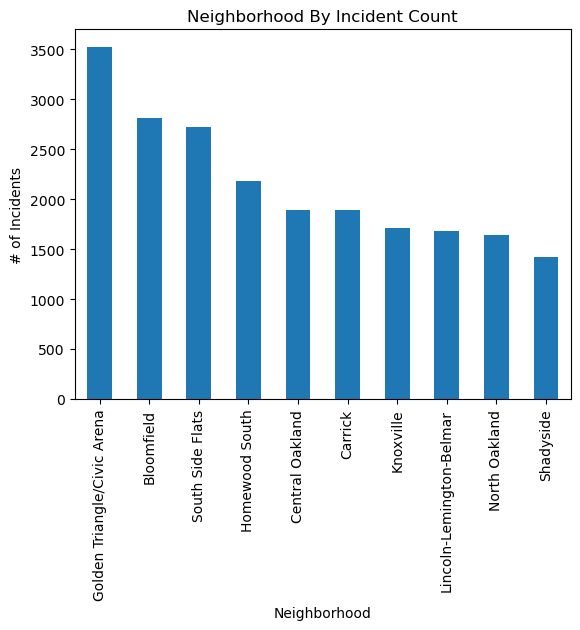

In [20]:
top10.plot.bar(xlabel = "Neighborhood", ylabel = "# of Incidents", title = "Neighborhood By Incident Count")


This is the neighborhoods with the most amount of police incidents shown in a bar graph


In [205]:
top10

INCIDENTNEIGHBORHOOD
Golden Triangle/Civic Arena    3524
Bloomfield                     2811
South Side Flats               2720
Homewood South                 2187
Central Oakland                1891
Carrick                        1887
Knoxville                      1716
Lincoln-Lemington-Belmar       1680
North Oakland                  1644
Shadyside                      1419
Name: count, dtype: int64

This shows the top 10 neighborhoods with the most incidents and the corresponding amounts. The bottom 7 are close in number, but the top 3 seperate themselves by a dirastic amount around 600 more than the bottom 7. 

In [22]:
import geopandas as gp
%matplotlib inline

In [45]:
neighborhoods = gp.read_file("Neighborhoods/Neighborhoods_.shp") 

This is the file that is being used to represent Pittsburgh as a map which is then used by geopandas to plot later on

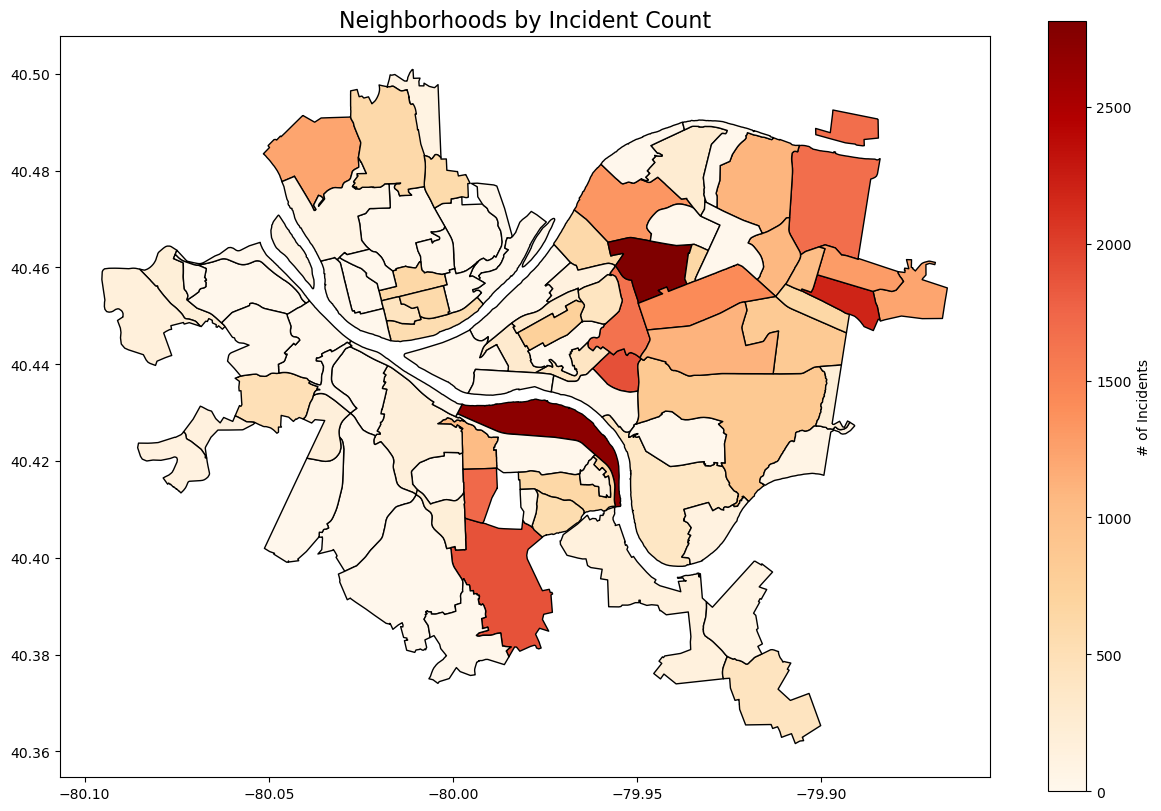

In [43]:
import matplotlib.pyplot as plt

incidentCounts = data['INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
incidentCounts.columns = ['Neighborhood', 'IncidentCount']

#Have to Standarize the names in the data
incidentCounts['Neighborhood'] = incidentCounts['Neighborhood'].str.strip().str.lower()
neighborhoods['hood'] = neighborhoods['hood'].str.strip().str.lower()

#This Merges the two datasets 
incidentMap = neighborhoods.merge(incidentCounts, how = 'left', left_on='hood', right_on='Neighborhood')


#Filling neighborhoods with no data with 0 incidents
incidentMap['IncidentCount'] = incidentMap['IncidentCount'].fillna(0)


fig, ax = plt.subplots(1, 1, figsize = (15,10))
incidentMap.plot(column = 'IncidentCount', cmap='OrRd', legend = True, legend_kwds= {'label': "# of Incidents"}, edgecolor= 'black', ax=ax)

#Adding a title to the top
ax.set_title("Neighborhoods by Incident Count", fontsize=16)

plt.show()
            

# Conclusion

The data shows that the Golden Triangle/Civic Arena neighborhood has the most amount of police incidents, meaning that it is the most dangerous neighborhood in Pittsburgh. The data also shows that the difference from the second most danergous to first is large number of over seven hundred more police incidents from Bloomfield to Golden Triangle/ Civic Arena. The Golden Triangle is commonly called Downtown Pittsburgh. The last neighborhood to be considered as one of the most dangerous, is South Side Flats. The top three most dangerous neighborhoods seperate themselves from the others by over five hundred police reports. That is a significant amount from the time period of 2005 to 2023. To sum everything up, the Godlen Triangle area is the worst to live in since it has the most amount of police incident reports. Nobody wants to live in a neighborhood were the police are always needed or needed to be called upon. 

## Drawbacks

Even though this data set was great to use in determining which neighborhood was the most dangerous, there were some drawbacks from using this data set. 
* One, the data set was stopped being updated in 2023. This doesn't influence the conclusion at all, since the difference between the top three most dangerous neighborhoods is so great. Also, the dataset is still recent as it is only 2024.
* Secondly, the names for the neighborhoods in the Police Incident Reports and the neighborhoods data file could be different. For example, Golden Triangle could be named downtown in the neighborhoods file.

In conclusion, there are not that many drawback in the dataset that was being used and overall the data represents the conclusion being made. 